In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif, f_regression, SelectKBest, SelectPercentile

In [2]:
import os 

base_dir = '/Volumes/KESU/BNP_Paribas_Cardif_Claims_Management'
data = os.path.join(base_dir, './dataset')
dataset = pd.read_csv(os.path.join(data, 'train.csv') )
dataset.shape

(114321, 133)

In [3]:
dataset.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [7]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(dataset.select_dtypes(numerics).columns)
dataset = dataset[numerical_vars]
dataset.shape

(114321, 114)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(labels=['ID', 'target'],axis=1), dataset['target'], random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((85740, 112), (28581, 112), (85740,), (28581,))

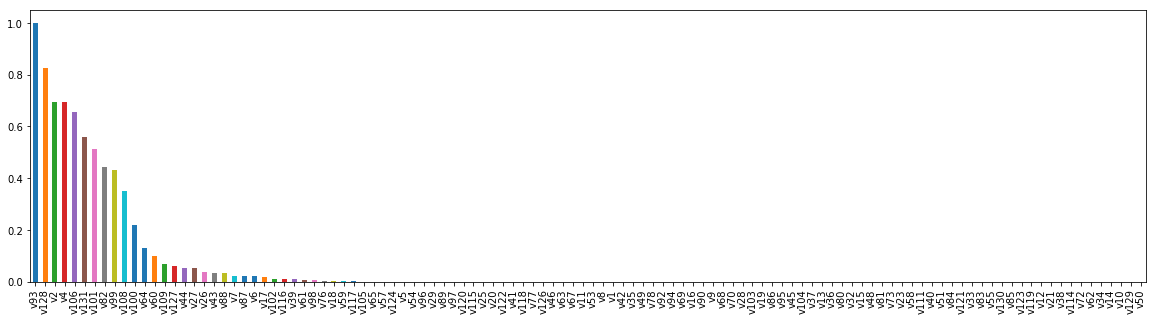

In [12]:
univariate = f_classif(X_train.fillna(0), y_train)
univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False).plot.bar(figsize=(20, 5))

In [13]:
sel_ = SelectKBest(f_classif, k=10).fit(X_train.fillna(0), y_train)
X_train.columns[sel_.get_support()]

Index(['v10', 'v14', 'v21', 'v34', 'v38', 'v50', 'v62', 'v72', 'v114', 'v129'], dtype='object')

In [14]:
X_train = sel_.transform(X_train.fillna(0))
X_train.shape

(85740, 10)